In [1]:
#installing packages
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install tabulate
!pip install seaborn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 51.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 43.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 32.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 15.6 MB/s eta 0:00:0000:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 48.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 46.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.0 MB/s eta 0:00:00


In [2]:
#import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import tree
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

4

In [3]:
#Defining Assining_Variables()
def Assining_Variables():
    fle1 = "Country-Code.csv"
    fle2 = "variable description.csv"
    fle3 = "rest_data.csv"
    return fle1,fle2,fle3

In [4]:
#Defining load_dataset()
def load_dataset(fle1,fle2,fle3):
    df_air_visit_data = pd.read_csv(fle1, encoding='latin-1')
    df_air_reserve = pd.read_csv(fle2,encoding='latin-1')
    df_air_store_info = pd.read_csv(fle3,encoding='latin-1')
    return df_air_visit_data,df_air_reserve,df_air_store_info

In [5]:
#Defining Counting_NAN_Values()
def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [6]:
#Defining Dataset_Cleaning()
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff['Restaurant ID'].isnull().sum()
        df_hpg_store = dff['Country Code'].isnull().sum()
        print("Count of NAN values on Restaurant ID  are: {0}".format(df_air_store))
        print("Count of NAN values on Country Code are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff['Restaurant ID'].isnull() & dff['Country Code'].isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (both Restaurant ID & Country Code) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        return dfff,df_nadn

In [7]:
#Defining Nan_Percent_Computation()
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [8]:
#Defining Pie_Chart_NAN_Column_Plotting()
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

In [9]:
#Defining Final_Dataset()
def Final_Dataset():
        fle1,fle2,fle3 = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info = load_dataset(fle1,fle2,fle3)
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        """df_air_visit_data = df_air_visit_data.reset_index()
        df_air_reserve = df_air_reserve.reset_index()
        df_air_store_info = df_air_store_info.reset_index()
        df_date_info = df_date_info.reset_index()"""
        df_n = pd.merge(df_air_visit_data,df_air_store_info,on='Country Code',how="outer")
        df = pd.concat([df_n,df_air_reserve], axis=0, join="outer")
        print(df)
        print(df.shape)
        return df

In [10]:
#Calling Final_Dataset()
df = Final_Dataset()

The shape of Country-Code.csv is (15, 2)
The shape of variable description.csv is (19, 2)
The shape of rest_data.csv is (9551, 19)
    Country Code Country  Restaurant ID  \
0            1.0   India         2701.0   
1            1.0   India       309548.0   
2            1.0   India         2742.0   
3            1.0   India       301523.0   
4            1.0   India         2724.0   
..           ...     ...            ...   
14           NaN     NaN            NaN   
15           NaN     NaN            NaN   
16           NaN     NaN            NaN   
17           NaN     NaN            NaN   
18           NaN     NaN            NaN   

                               Restaurant Name       City  \
0            Orient Express - Taj Palace Hotel  New Delhi   
1     Tian - Asian Cuisine Studio - ITC Maurya  New Delhi   
2                         Bukhara - ITC Maurya  New Delhi   
3   Nostalgia at 1911 Brasserie - The Imperial  New Delhi   
4                          1911 - The Imperial 

In [11]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Variable,Description


In [12]:
df[df.isnull()]


,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Variable,Description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

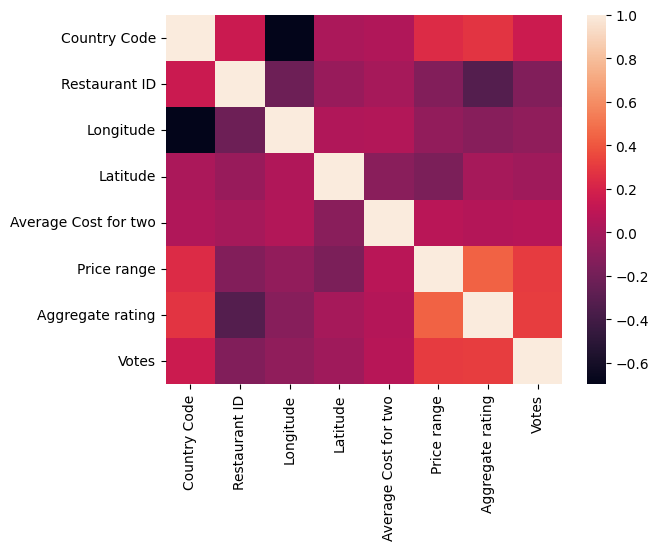

In [13]:
sns.heatmap(df.corr())

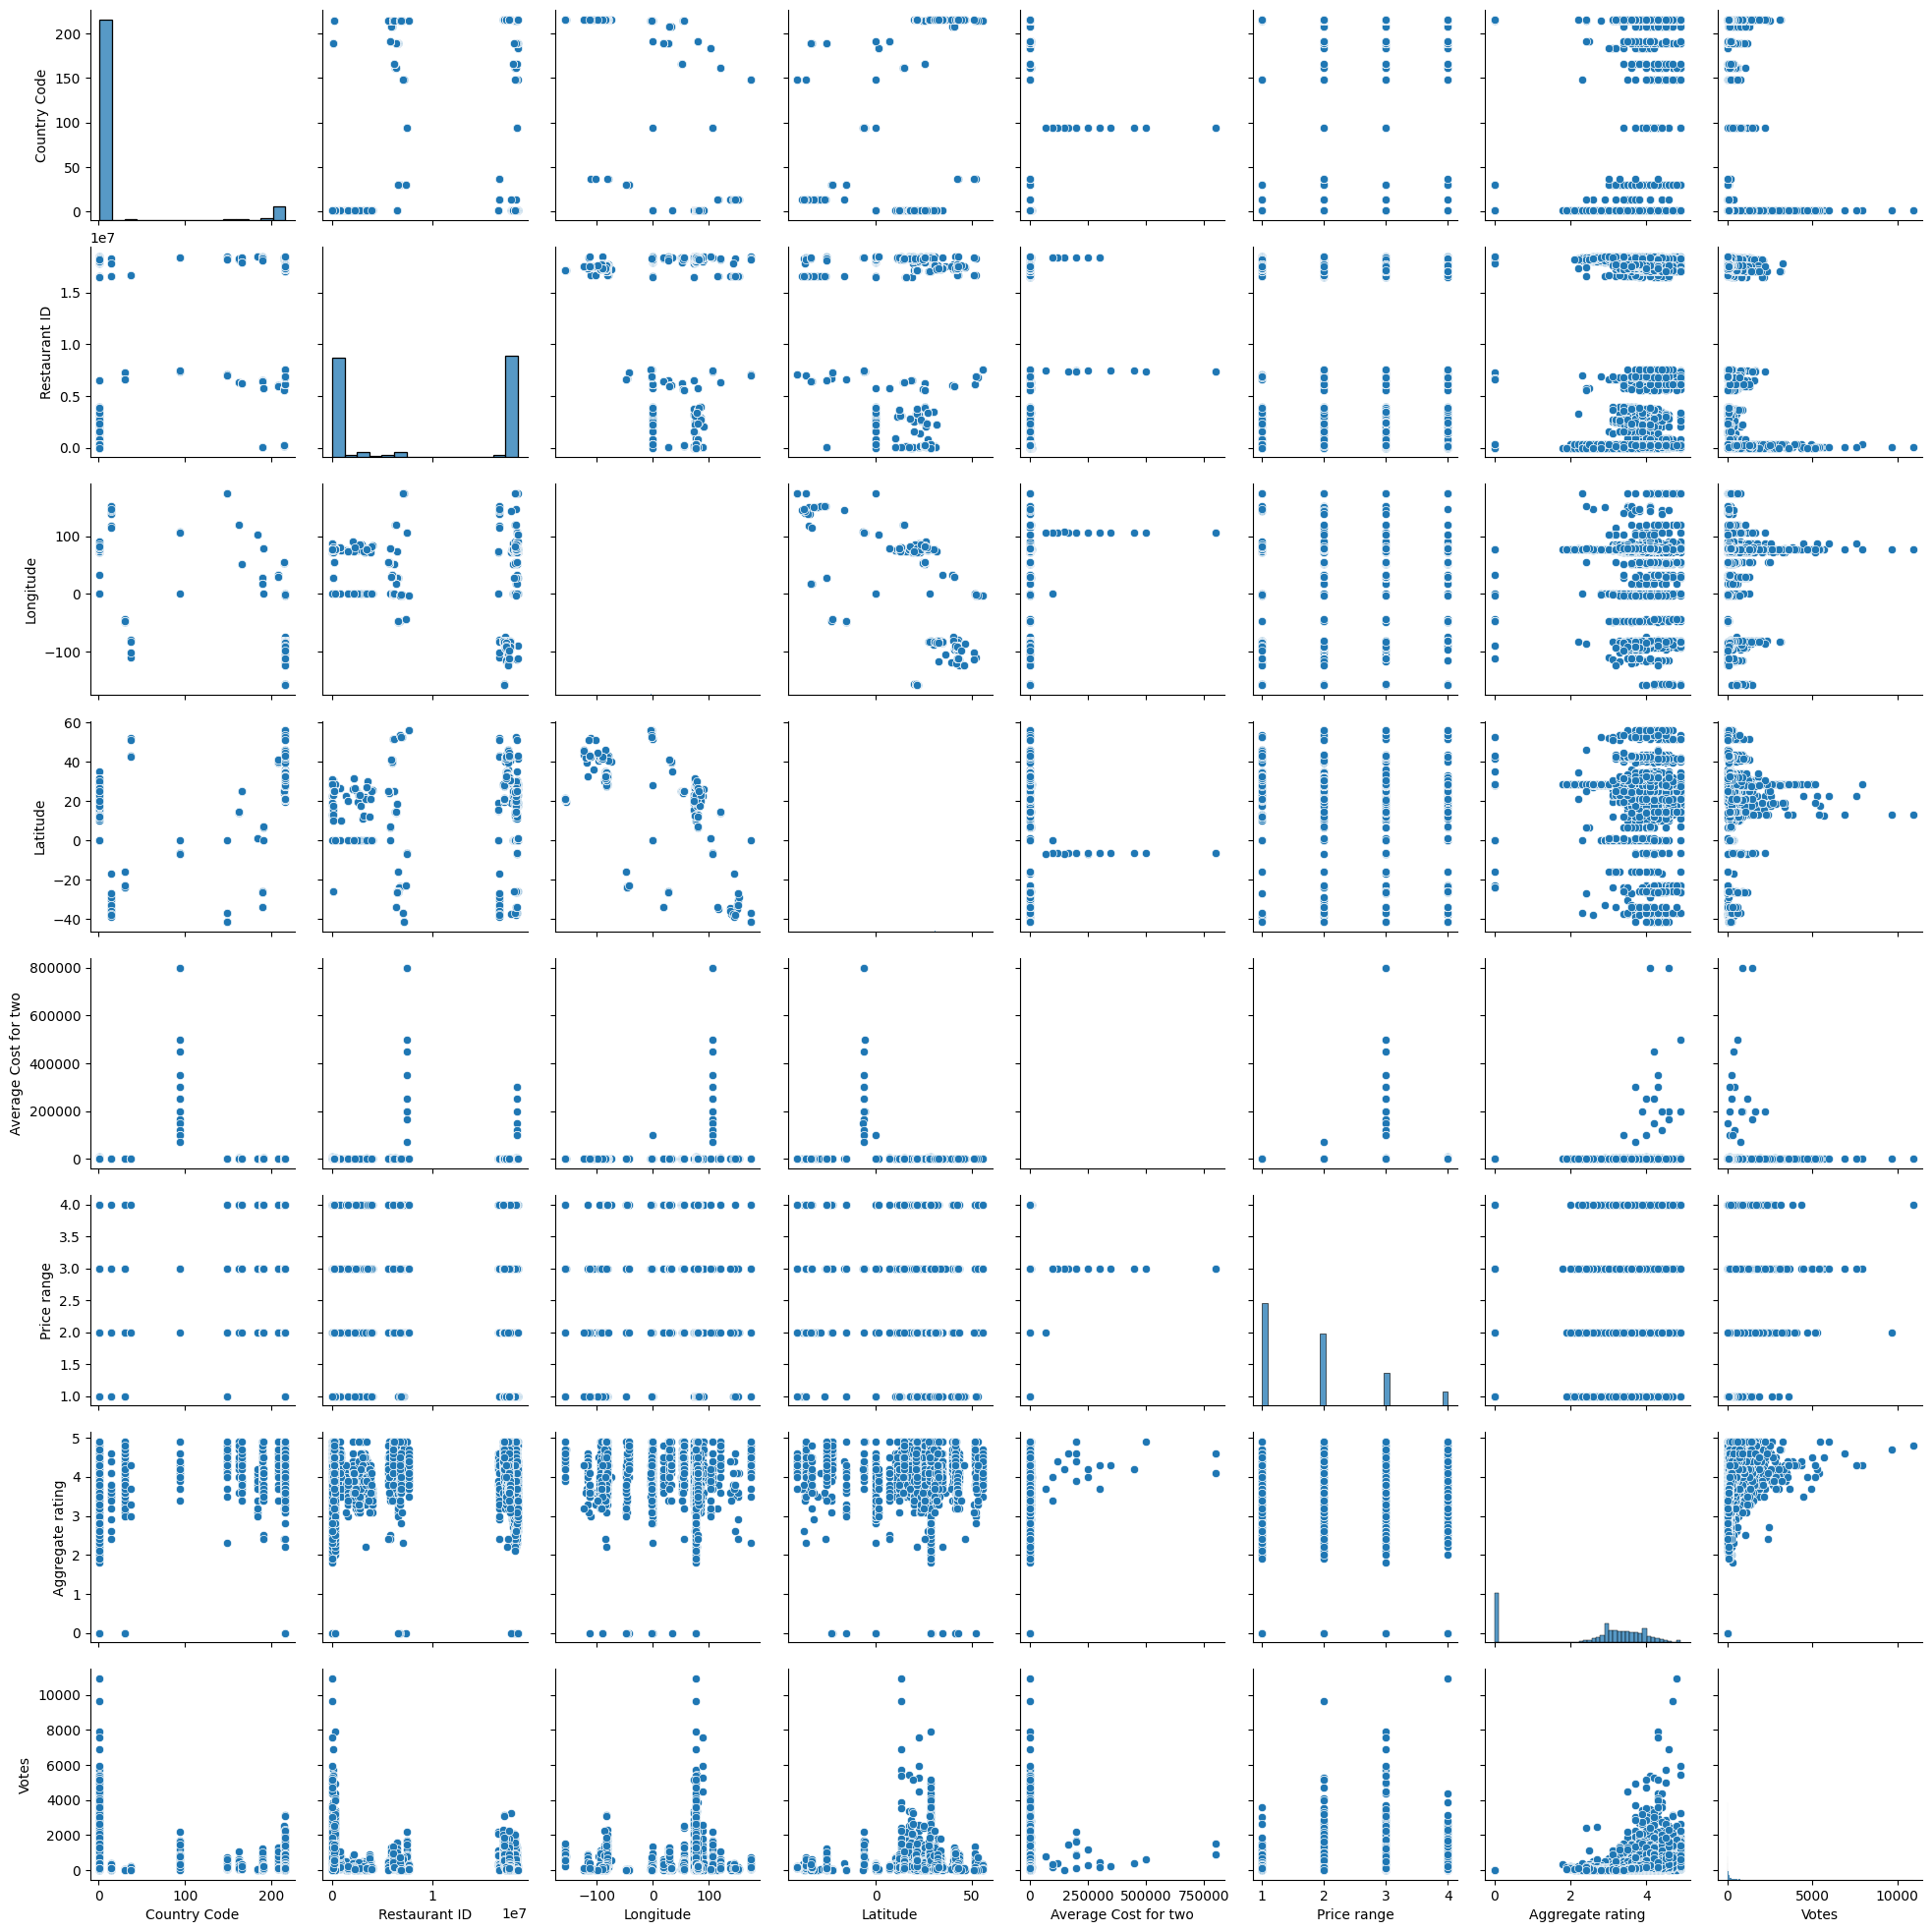

In [14]:
sns.pairplot(df)

<AxesSubplot:>

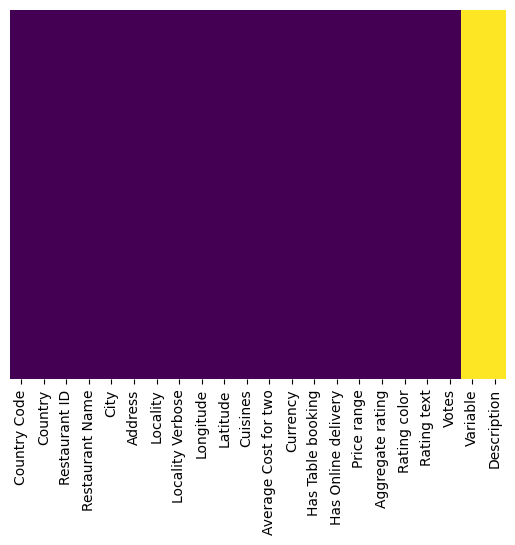

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9570 entries, 0 to 18
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   float64
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   float64
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   float64
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Price range           9

In [ ]:
!pip install pandas_profiling
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [ ]:
!pip install sweetviz
my_report  = sweetviz.analyze([df,'Train'], target_feat='Restaurant Name')
my_report.show_html('FinalReport.html')

In [ ]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df1 = AV.AutoViz('rest_data.csv')
df1

In [ ]:
sns.boxplot(data=df, orient='v')

In [ ]:
sns.violinplot(x='Country Code',y='Restaurant ID',data=df,palette='rainbow')

Total NAN values are : 19491
Data with at least 1 NAN values: 9570
Rows filled NAN data: 0
Count of NAN values on Restaurant ID  are: 19
Count of NAN values on Country Code are: 19
Number of Invalid IDs (both Restaurant ID & Country Code) are : 19
+----------------------+-------------+
|                      |   Nan count |
|----------------------+-------------|
| Country Code         |          19 |
| Country              |          19 |
| Restaurant ID        |          19 |
| Restaurant Name      |          19 |
| City                 |          19 |
| Address              |          19 |
| Locality             |          19 |
| Locality Verbose     |          19 |
| Longitude            |          19 |
| Latitude             |          19 |
| Cuisines             |          28 |
| Average Cost for two |          19 |
| Currency             |          19 |
| Has Table booking    |          19 |
| Has Online delivery  |          19 |
| Price range          |          19 |
| Aggregate

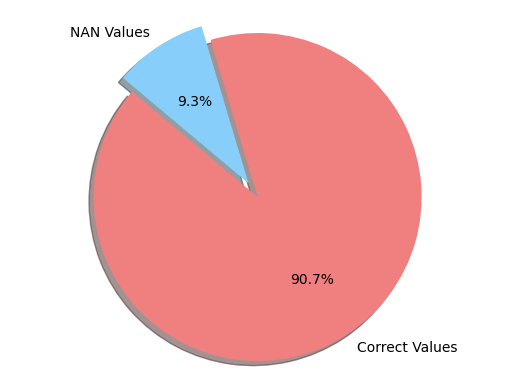

+----------------------+------------------+
|                      |   % of NAN Count |
|----------------------+------------------|
| Country Code         |         0.198537 |
| Country              |         0.198537 |
| Restaurant ID        |         0.198537 |
| Restaurant Name      |         0.198537 |
| City                 |         0.198537 |
| Address              |         0.198537 |
| Locality             |         0.198537 |
| Locality Verbose     |         0.198537 |
| Longitude            |         0.198537 |
| Latitude             |         0.198537 |
| Cuisines             |         0.292581 |
| Average Cost for two |         0.198537 |
| Currency             |         0.198537 |
| Has Table booking    |         0.198537 |
| Has Online delivery  |         0.198537 |
| Price range          |         0.198537 |
| Aggregate rating     |         0.198537 |
| Rating color         |         0.198537 |
| Rating text          |         0.198537 |
| Votes                |        

In [18]:
#Printing the number of NANs in each column
total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
df_nan_disp = pd.DataFrame()

#Printing the PieChart -> number of NANs
Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
n_rows = len(df)
for i in range(0,len(df_najn)):
    nan_percent_in_each_col = ((df_najn/n_rows)*100)
    df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))

In [19]:
#Dropping the columns directly whose Nan% is >=98%.
df.drop(['Variable','Description'],axis=1,inplace=True)

In [20]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1.0,India,2701.0,Orient Express - Taj Palace Hotel,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000.0,Indian Rupees(Rs.),Yes,No,4.0,4.0,Green,Very Good,145.0
1,1.0,India,309548.0,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000.0,Indian Rupees(Rs.),No,No,4.0,4.1,Green,Very Good,188.0
2,1.0,India,2742.0,Bukhara - ITC Maurya,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500.0,Indian Rupees(Rs.),No,No,4.0,4.4,Green,Very Good,2826.0
3,1.0,India,301523.0,Nostalgia at 1911 Brasserie - The Imperial,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000.0,Indian Rupees(Rs.),Yes,No,4.0,3.2,Orange,Average,12.0
4,1.0,India,2724.0,1911 - The Imperial,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000.0,Indian Rupees(Rs.),Yes,No,4.0,3.9,Yellow,Good,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Dropping the column subset w.r.t. 'productsBought'
df.dropna(subset=['Restaurant Name'],inplace=True)

In [22]:
#Displaying the Nan Count
df_nadbjn = Counting_NAN_Values(df)

+----------------------+-------------+
|                      |   Nan count |
|----------------------+-------------|
| Country Code         |           0 |
| Country              |           0 |
| Restaurant ID        |           0 |
| Restaurant Name      |           0 |
| City                 |           0 |
| Address              |           0 |
| Locality             |           0 |
| Locality Verbose     |           0 |
| Longitude            |           0 |
| Latitude             |           0 |
| Cuisines             |           9 |
| Average Cost for two |           0 |
| Currency             |           0 |
| Has Table booking    |           0 |
| Has Online delivery  |           0 |
| Price range          |           0 |
| Aggregate rating     |           0 |
| Rating color         |           0 |
| Rating text          |           0 |
| Votes                |           0 |
+----------------------+-------------+


In [23]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1.0,India,2701.0,Orient Express - Taj Palace Hotel,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000.0,Indian Rupees(Rs.),Yes,No,4.0,4.0,Green,Very Good,145.0
1,1.0,India,309548.0,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000.0,Indian Rupees(Rs.),No,No,4.0,4.1,Green,Very Good,188.0
2,1.0,India,2742.0,Bukhara - ITC Maurya,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500.0,Indian Rupees(Rs.),No,No,4.0,4.4,Green,Very Good,2826.0
3,1.0,India,301523.0,Nostalgia at 1911 Brasserie - The Imperial,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000.0,Indian Rupees(Rs.),Yes,No,4.0,3.2,Orange,Average,12.0
4,1.0,India,2724.0,1911 - The Imperial,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000.0,Indian Rupees(Rs.),Yes,No,4.0,3.9,Yellow,Good,272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216.0,United States,17334679.0,Azteca,Davenport,"4811 N Brady St Ste 3, Davenport, IA 52806",Davenport,"Davenport, Davenport",-90.568300,41.569900,Mexican,0.0,Dollar($),No,No,1.0,4.3,Green,Very Good,167.0
9547,216.0,United States,17342548.0,Happy Joe's Pizza & Ice Cream,Dubuque,"855 Century Dr, Dubuque, IA 52002",Dubuque,"Dubuque, Dubuque",-90.726400,42.495500,"Desserts, Pizza, Ice Cream",0.0,Dollar($),No,No,1.0,3.5,Yellow,Good,74.0
9548,216.0,United States,17606621.0,HI Lite Bar & Lounge,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0.0,Dollar($),No,No,1.0,3.4,Orange,Average,11.0
9549,216.0,United States,17582499.0,Royal Hotel,Pocatello,"11 E Main St, Lava Hot Springs, ID 83246",Lava Hot Springs,"Lava Hot Springs, Pocatello",-112.012700,42.619200,"Pizza, Bar Food",0.0,Dollar($),No,No,1.0,3.6,Yellow,Good,59.0


In [25]:
df['Restaurant Name'].value_counts()

Cafe Coffee Day          83
Domino's Pizza           79
Subway                   63
Green Chick Chop         51
McDonald's               48
                         ..
Invitation Restaurant     1
Punjabi Culture           1
Cravings                  1
U & I                     1
Senor Iguanas             1
Name: Restaurant Name, Length: 7446, dtype: int64

In [27]:
res_name = df['Restaurant Name'].value_counts()
res_name

Cafe Coffee Day          83
Domino's Pizza           79
Subway                   63
Green Chick Chop         51
McDonald's               48
                         ..
Invitation Restaurant     1
Punjabi Culture           1
Cravings                  1
U & I                     1
Senor Iguanas             1
Name: Restaurant Name, Length: 7446, dtype: int64

In [28]:
res_city = df['City'].value_counts()
res_city

New Delhi        5473
Gurgaon          1118
Noida            1080
Faridabad         251
Ghaziabad          25
                 ... 
Consort             1
Yorkton             1
Bandung             1
Tagaytay City       1
Miller              1
Name: City, Length: 141, dtype: int64

Text(0.5, 1.0, 'geographical distribution of the restaurants vs Cities')

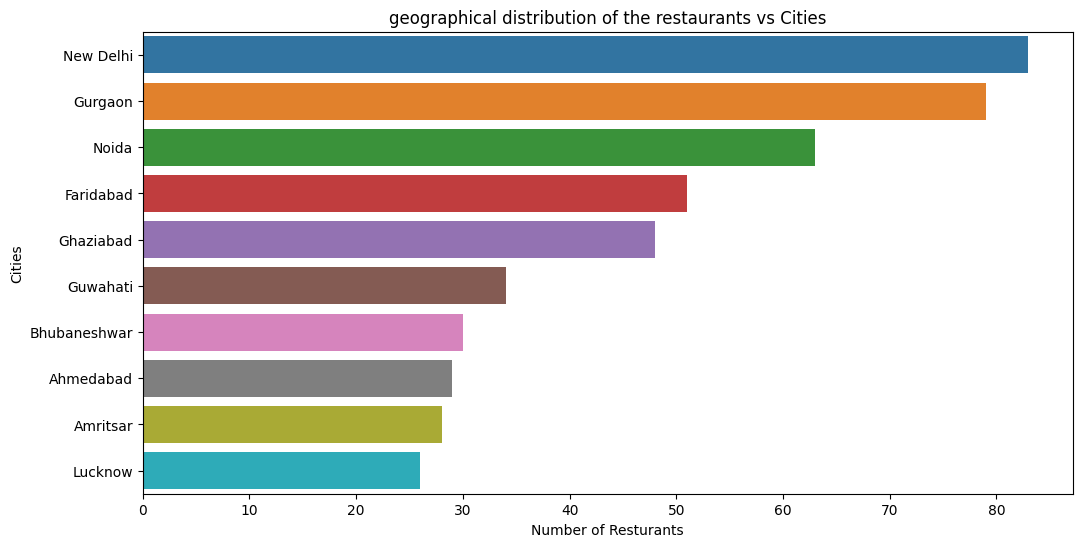

In [43]:
#Explore the geographical distribution of the restaurants and identify the cities with minimum and maximum number of restaurants
plt.figure(figsize=(12,6))
sns.barplot(x=res_name.head(10), y=res_city.head(10).index)
plt.ylabel("Cities")
plt.xlabel('Number of Resturants')
plt.title('geographical distribution of the restaurants vs Cities')

In [37]:
has_table_booking = len(df[df['Has Table booking']== "Yes"])
has_table_booking

1158

In [38]:
has_not_table_booking = len(df[df['Has Table booking']== "No"])
has_not_table_booking

8393

In [39]:
#Find out the ratio between restaurants that allow table booking vs that dont allow table booking.
ratio_between_restaurant_table_booking = has_table_booking/has_not_table_booking
ratio_between_restaurant_table_booking

0.13797211962349576

In [44]:
res_locality = df['Locality'].value_counts()
res_locality

Connaught Place    122
Rajouri Garden      99
Shahdara            87
Defence Colony      86
Pitampura           85
                  ... 
Kilpauk              1
Durga Puri           1
Model Town 1         1
Sheikh Sarai         1
Miller               1
Name: Locality, Length: 1208, dtype: int64

In [46]:
res_country = df['Country'].value_counts()
res_country

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

Text(0.5, 1.0, 'Resturants Franchising for National Presence')

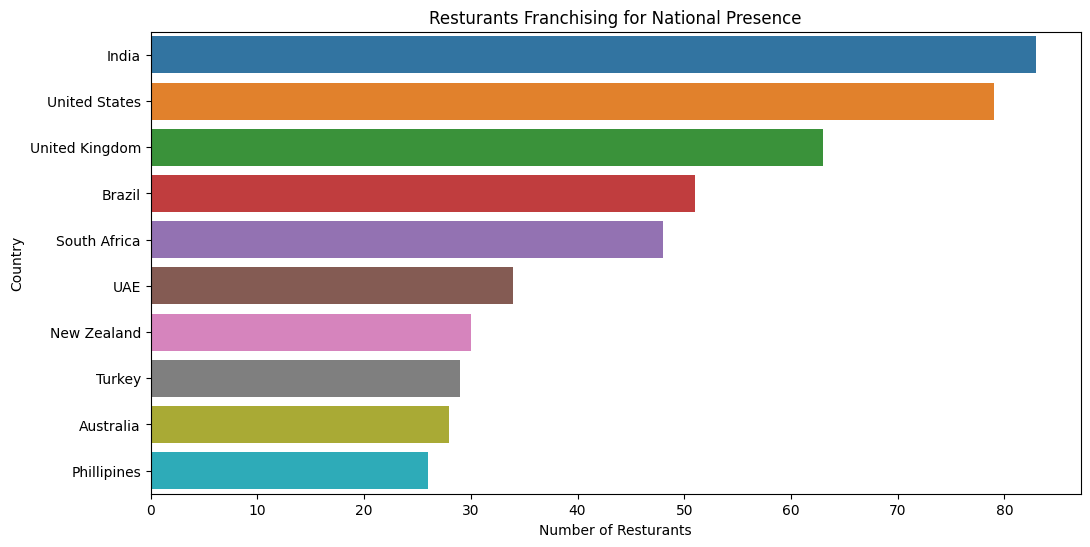

In [47]:
#To explore the restaurant franchising with most national presence.
plt.figure(figsize=(12,6))
sns.barplot(x=res_name.head(10), y=res_country.head(10).index)
plt.ylabel("Country")
plt.xlabel('Number of Resturants')
plt.title('Resturants Franchising for National Presence')

In [48]:
res_cuisines = df['Cuisines'].value_counts()
res_cuisines

North Indian                                     936
North Indian, Chinese                            511
Fast Food                                        354
Chinese                                          354
North Indian, Mughlai                            334
                                                ... 
North Indian, Thai, Italian, Chinese, Mexican      1
Continental, Chinese, Mexican, North Indian        1
Thai, Chinese, Asian                               1
North Indian, Italian, Mexican, Asian              1
Desserts, Pizza, Ice Cream                         1
Name: Cuisines, Length: 1825, dtype: int64

Text(0.5, 1.0, 'Top 10 cuisines served across cities')

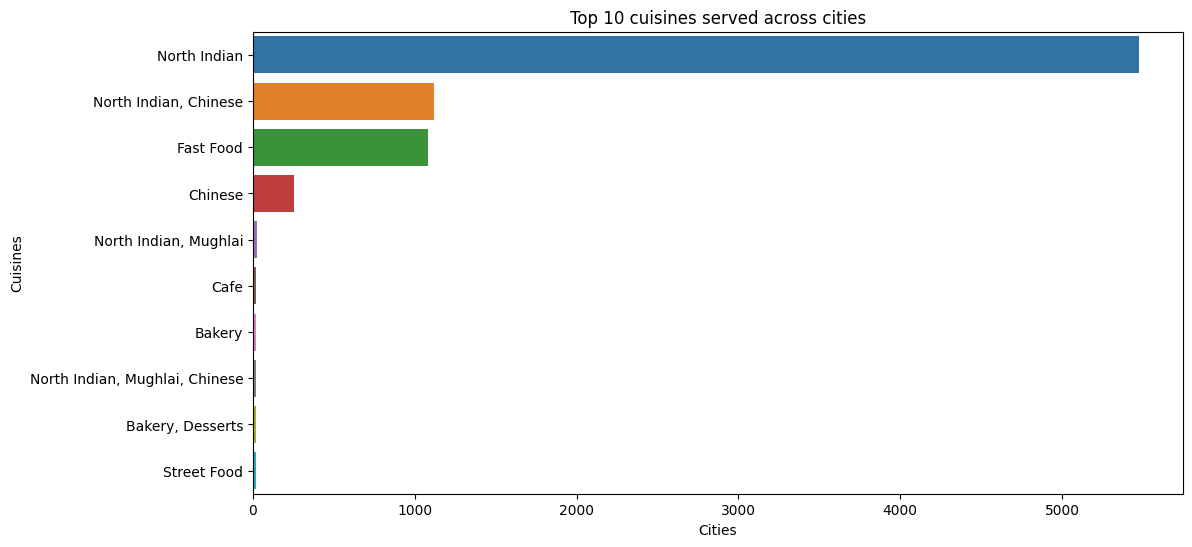

In [50]:
#Top 10 cuisines served across cities
plt.figure(figsize=(12,6))
sns.barplot(x=res_city.head(10), y=res_cuisines.head(10).index)
plt.ylabel("Cuisines")
plt.xlabel('Cities')
plt.title('Top 10 cuisines served across cities')

Text(0.5, 1.0, 'Number of cuisines that a restaurant serves')

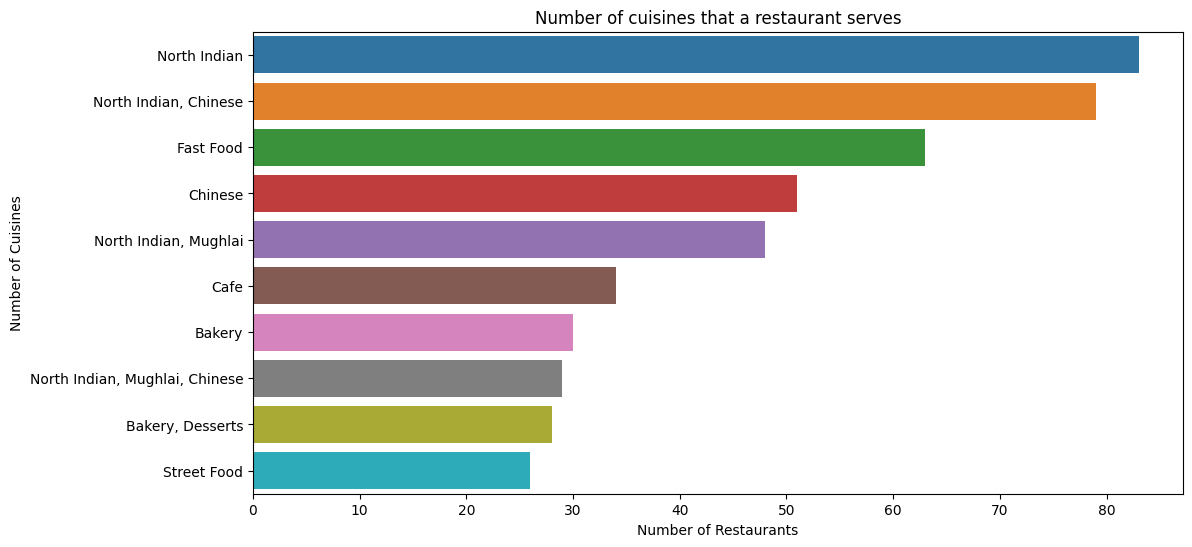

In [45]:
#Max and min number of cuisines that a restaurant serves
plt.figure(figsize=(12,6))
sns.barplot(x=res_name.head(10), y=res_cuisines.head(10).index)
plt.ylabel("Number of Cuisines")
plt.xlabel('Number of Restaurants')
plt.title('Number of cuisines that a restaurant serves')

In [51]:
dist_cost = df['Average Cost for two'].value_counts()
dist_cost

500.0       900
300.0       897
400.0       857
200.0       687
600.0       652
           ... 
350000.0      1
165000.0      1
150000.0      1
120000.0      1
290.0         1
Name: Average Cost for two, Length: 140, dtype: int64

Text(0.5, 1.0, 'Number of cuisines that a restaurant serves')

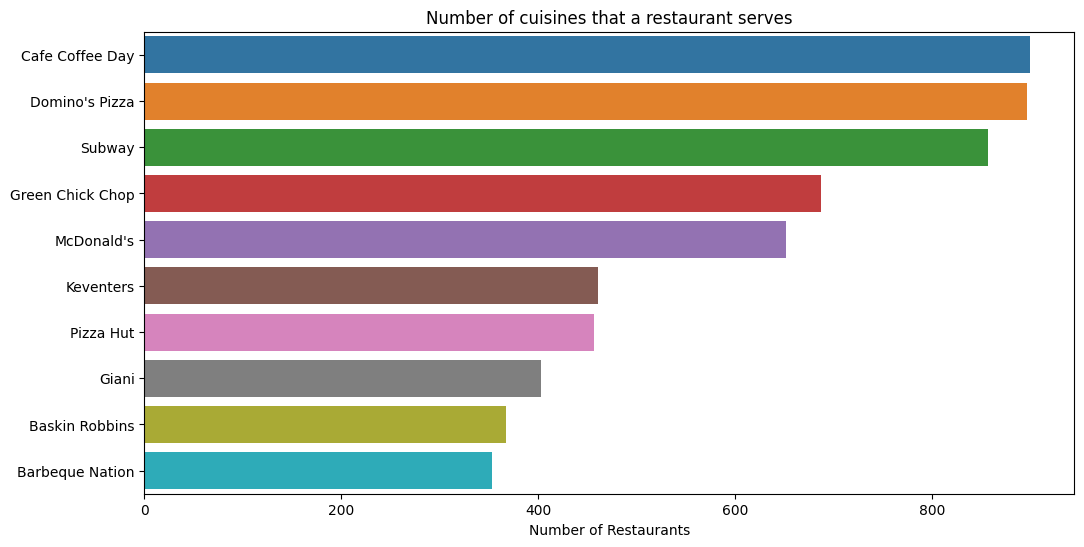

In [49]:
"""plt.figure(figsize=(12,6))
sns.barplot(x=dist_cost.head(10), y=res_name.head(10).index)
plt.ylabel(None)
plt.xlabel('Number of Restaurants')
plt.title('Number of cuisines that a restaurant serves')"""

In [52]:
agg_rating = df['Aggregate rating'].value_counts()
agg_rating

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

Text(0.5, 1.0, 'Effect of Cuisines on Rating')

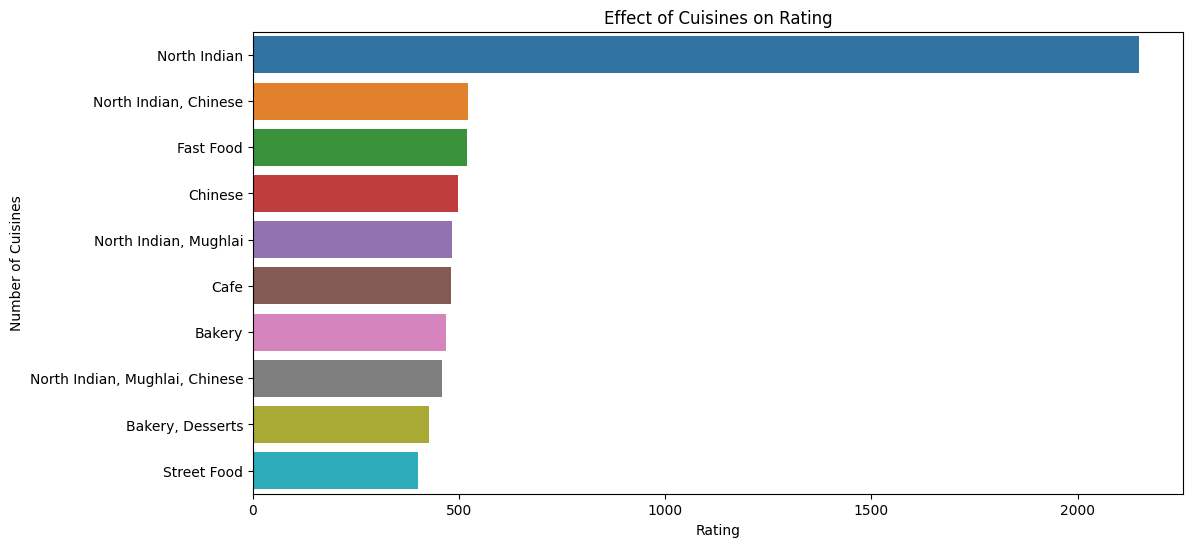

In [54]:
#Effect of Cuisines on Rating
plt.figure(figsize=(12,6))
sns.barplot(x=agg_rating.head(10), y=res_cuisines.head(10).index)
plt.ylabel("Number of Cuisines")
plt.xlabel('Rating')
plt.title('Effect of Cuisines on Rating')

In [55]:
cost = df['Price range'].value_counts()
cost

1.0    4444
2.0    3113
3.0    1408
4.0     586
Name: Price range, dtype: int64

Text(0.5, 1.0, 'Effect of Cuisines on Cost')

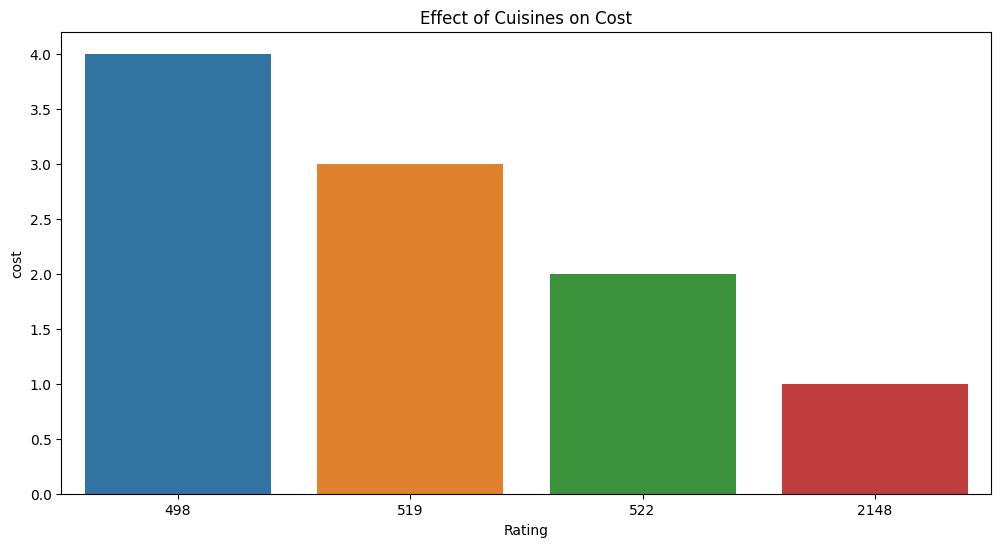

In [56]:
#Effect of Cuisines on Cost
plt.figure(figsize=(12,6))
sns.barplot(x=agg_rating.head(4), y=cost.head(4).index)
plt.ylabel("cost")
plt.xlabel('Rating')
plt.title('Effect of Cuisines on Cost')

In [58]:
delivery = df['Has Online delivery'].value_counts()
delivery

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

Text(0.5, 1.0, 'Effect of Cuisines on Online Delivery')

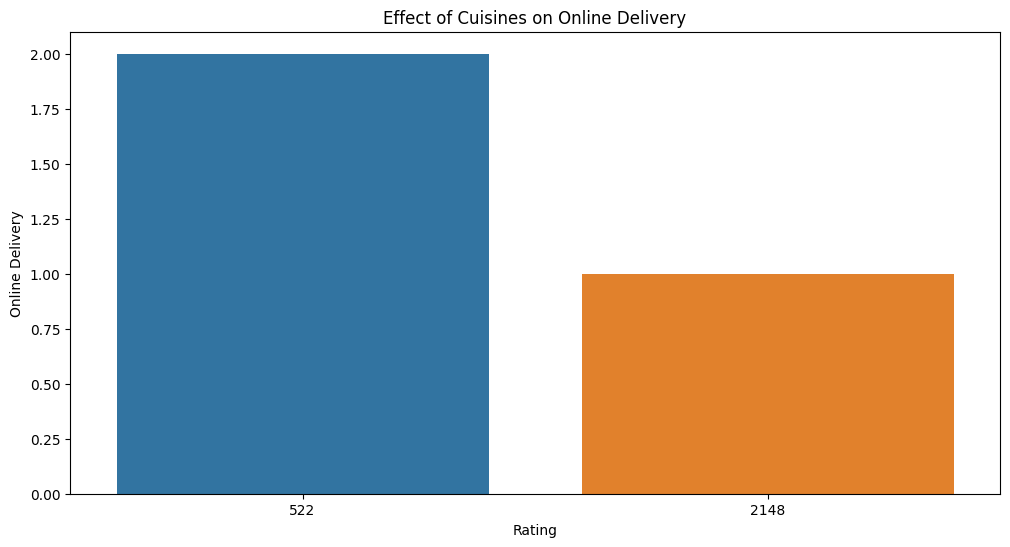

In [71]:
#Effect of Cuisines on Online Delivery
plt.figure(figsize=(12,6))
sns.barplot(x=agg_rating.head(2), y=cost.head(2).index)
plt.ylabel("Online Delivery")
plt.xlabel('Rating')
plt.title('Effect of Cuisines on Online Delivery')

In [72]:
has_online_delivery = len(df[df['Has Online delivery']== "Yes"])
has_online_delivery

2451

In [73]:
has_total_delivery = len(df['Has Online delivery'])
has_total_delivery

9551

In [75]:
#% of restaurants that has online delivery
per_online_delivery = (has_online_delivery/has_total_delivery)*100
per_online_delivery

25.662234321013504